<a href="https://colab.research.google.com/github/Vamsee27/Automatic-Target-Detection/blob/main/Target_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the necessary libraries
import zipfile
import os
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define the path to the zip file and extract it
zip_path = '/content/drive/MyDrive/TargetDetection/Target.zip'
zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall('/content')
zip_ref.close()

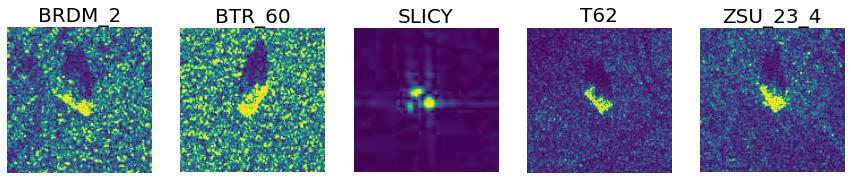

In [ ]:
# Define the path to the extracted folder
data_path = '/content/Target'

# Define a list of the class names
class_names = ['BRDM_2', 'BTR_60', 'SLICY', 'T62', 'ZSU_23_4']

# Display one image from each class
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,15))
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_path, class_name)
    file_name = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, file_name)
    img = plt.imread(img_path)
    #print(img.size)
    axes[i].imshow(img)
    axes[i].set_title(class_name, fontsize=20)
    axes[i].axis('off')
plt.show()

#Data Preprocessing

In [ ]:
from PIL import Image
import numpy as np
import os

# Define the input shape of the model
input_shape = (128, 128, 3)

# Load the images and resize them to the input shape
images = []
labels = []
class_names = ['BRDM_2', 'BTR_60', 'SLICY', 'T62', 'ZSU_23_4']
for class_name in class_names:
    folder_path = '/content/Target/' + class_name
    for img_name in os.listdir(folder_path):
        if img_name.endswith('.JPG') or img_name.endswith('.JPEG') or img_name.endswith('.PNG'):
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path)
            img = img.resize((input_shape[0], input_shape[1]))
            img = np.array(img)
            images.append(img)
            labels.append(class_names.index(class_name))

# Convert image and label lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

#Exploratory Data Analysis

Class 1: BRDM_2 - 275 images
Class 2: BTR_60 - 196 images
Class 3: SLICY - 275 images
Class 4: T62 - 274 images
Class 5: ZSU_23_4 - 275 images


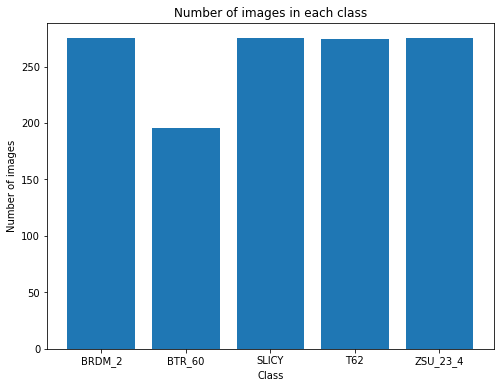

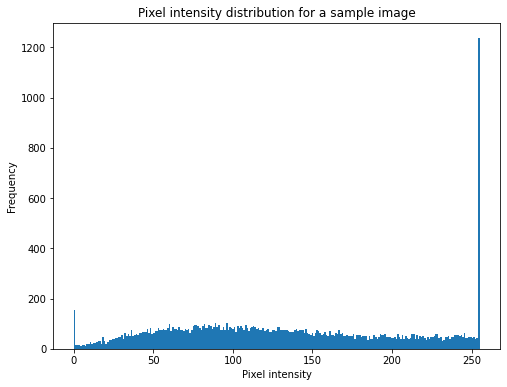

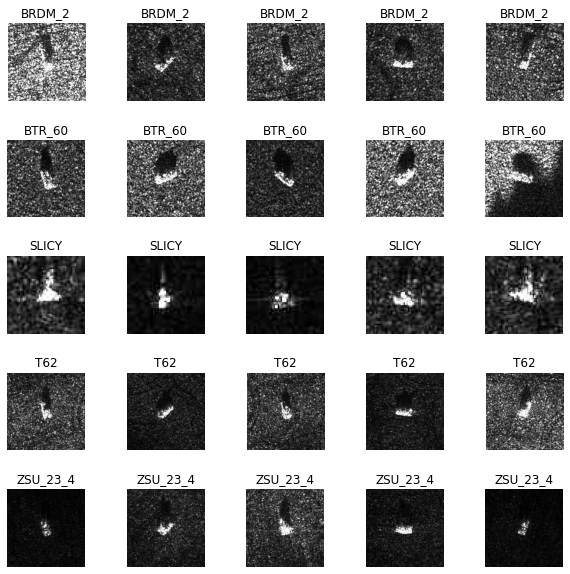

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# initialize a list to store the number of images in each class
num_images = []

# loop through each class directory and count the number of images
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_path, class_name)
    num_images.append(len(os.listdir(class_path)))
    print(f"Class {i+1}: {class_name} - {num_images[i]} images")

# visualize the number of images in each class
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(class_names, num_images)
ax.set_title('Number of images in each class')
ax.set_xlabel('Class')
ax.set_ylabel('Number of images')
plt.show()

# visualize the pixel intensity distribution for a sample image
sample_image = plt.imread(os.path.join(data_path, class_names[0], os.listdir(os.path.join(data_path, class_names[0]))[0]))
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(sample_image.ravel(), bins=256, range=(0, 255))
ax.set_title('Pixel intensity distribution for a sample image')
ax.set_xlabel('Pixel intensity')
ax.set_ylabel('Frequency')
plt.show()

# visualize some sample images from each class
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_path, class_name)
    image_names = os.listdir(class_path)
    for j in range(5):
        img = plt.imread(os.path.join(class_path, image_names[j]))
        axs[i, j].imshow(img, cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(class_name)
plt.show()

#Split DataSet 

In [ ]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.applications import VGG16

# Set seed for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)

# Define directories and parameters

batch_size = 32
img_size = (128, 128)
num_classes = 5

# Create data generators for train and test splits
datagen_train = ImageDataGenerator(rescale=1./255, validation_split=0.2)
datagen_test = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory(
    data_path, 
    target_size=img_size, 
    batch_size=batch_size, 
    subset='training', 
    seed=seed,
    classes=['BRDM_2', 'BTR_60', 'SLICY', 'T62', 'ZSU_23_4']
)

validation_generator = datagen_train.flow_from_directory(
    data_path, 
    target_size=img_size, 
    batch_size=batch_size, 
    subset='validation', 
    seed=seed,
    classes=['BRDM_2', 'BTR_60', 'SLICY', 'T62', 'ZSU_23_4']
)

test_generator = datagen_test.flow_from_directory(
    data_path, 
    target_size=img_size, 
    batch_size=batch_size,
    shuffle=False,
    seed=seed,
    classes=['BRDM_2', 'BTR_60', 'SLICY', 'T62', 'ZSU_23_4']
)

Found 1035 images belonging to 5 classes.
Found 255 images belonging to 5 classes.
Found 1290 images belonging to 5 classes.


#Models

1. CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Train CNN model

In [ ]:
history_cnn = cnn_model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
33/33 [==============================] - 45s 1s/step - loss: 1.1943 - accuracy: 0.4696 - val_loss: 0.7669 - val_accuracy: 0.6588
Epoch 2/10
33/33 [==============================] - 42s 1s/step - loss: 0.5779 - accuracy: 0.7710 - val_loss: 0.3537 - val_accuracy: 0.9333
Epoch 3/10
33/33 [==============================] - 39s 1s/step - loss: 0.1957 - accuracy: 0.9478 - val_loss: 0.0953 - val_accuracy: 0.9843
Epoch 4/10
33/33 [==============================] - 43s 1s/step - loss: 0.0905 - accuracy: 0.9739 - val_loss: 0.0658 - val_accuracy: 0.9765
Epoch 5/10
33/33 [==============================] - 42s 1s/step - loss: 0.0267 - accuracy: 0.9932 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 6/10
33/33 [==============================] - 41s 1s/step - loss: 0.0111 - accuracy: 0.9981 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 7/10
33/33 [==============================] - 42s 1s/step - loss: 0.0194 - accuracy: 0.9923 - val_loss: 0.0339 - val_accuracy: 0.9922
Epoch 8/10
33/33 [==

CNN model summary

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

CNN model evaluation

In [ ]:
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(validation_generator)
print('Test accuracy for CNN Model:', test_acc_cnn)

8/8 [==============================] - 4s 517ms/step - loss: 0.0066 - accuracy: 0.9961
Test accuracy for CNN Model: 0.9960784316062927


Accuracy/loss v/s epoch

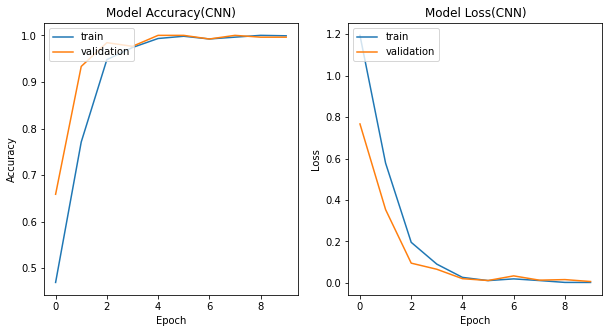

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model Accuracy(CNN)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

# Plot loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model Loss(CNN)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

41/41 [==============================] - 14s 335ms/step


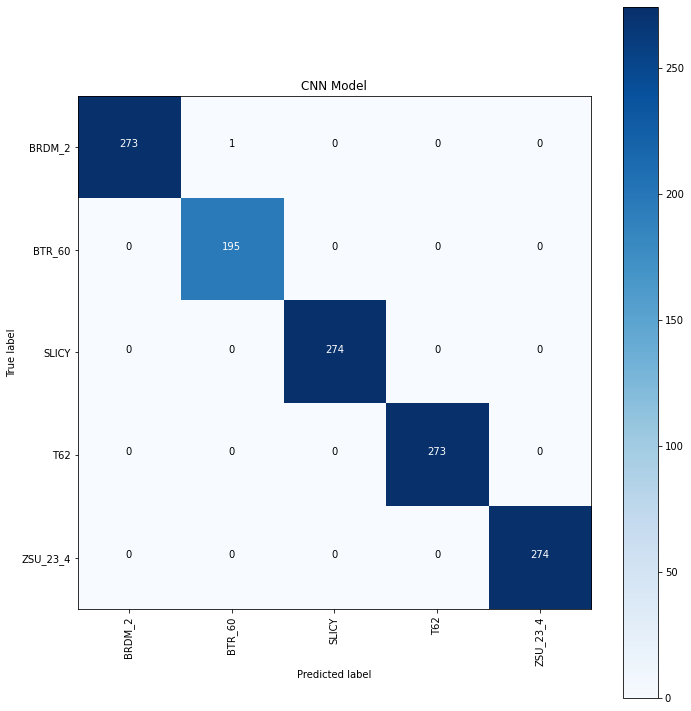

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import itertools

# Make predictions on the test set
preds_cnn = cnn_model.predict(test_generator)

# Convert predictions and true labels to one-hot encoded vectors
pred_classes_cnn = np.argmax(preds_cnn, axis=1)
true_classes_cnn = test_generator.classes

# Create a confusion matrix
cnn_cm = confusion_matrix(true_classes_cnn, pred_classes_cnn)
#print(sar_cm)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cnn_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
fmt = 'd'
thresh = cnn_cm.max() / 2.
for i, j in itertools.product(range(cnn_cm.shape[0]), range(cnn_cm.shape[1])):
    plt.text(j, i, format(cnn_cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cnn_cm[i, j] > thresh else "black")
plt.tight_layout()
plt.title('CNN Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Classification report

In [ ]:
print('Classification Report:\n', classification_report(true_classes_cnn, pred_classes_cnn, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

      BRDM_2       1.00      1.00      1.00       274
      BTR_60       0.99      1.00      1.00       195
       SLICY       1.00      1.00      1.00       274
         T62       1.00      1.00      1.00       273
    ZSU_23_4       1.00      1.00      1.00       274

    accuracy                           1.00      1290
   macro avg       1.00      1.00      1.00      1290
weighted avg       1.00      1.00      1.00      1290



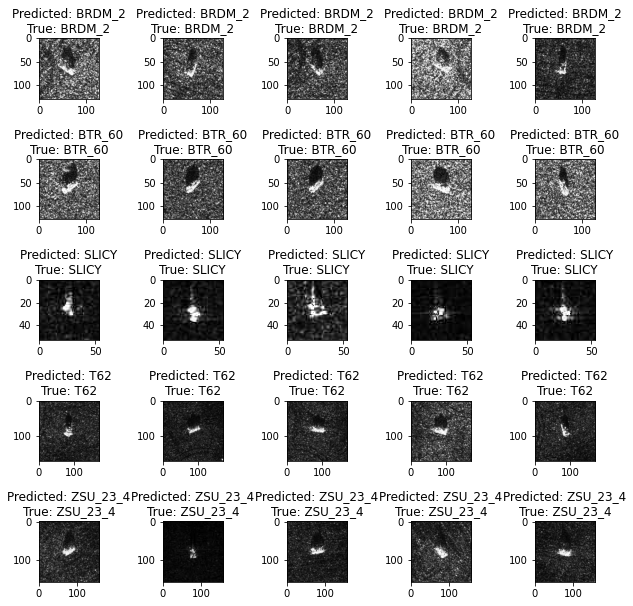

In [ ]:
test_data = test_generator

predicted_labels_cnn = np.argmax(preds_cnn, axis=1)
true_labels = test_data.classes

# Display the predicted and true labels for 5 images in each class
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(hspace=1.0, wspace=1.0)
for i in range(len(class_names)):
    class_indices = np.where(true_labels == i)[0]
    random_indices = np.random.choice(class_indices, size=5, replace=False)
    for j, idx in enumerate(random_indices):
        img = plt.imread(test_data.filepaths[idx])
        axs[i, j].imshow(img, cmap = 'gray')
        axs[i, j].set_title("Predicted: {}\nTrue: {}".format(class_names[predicted_labels_cnn[idx]], 
                                                               class_names[true_labels[idx]]))
plt.show()

2. SARNet model

In [ ]:
sar_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [ ]:
sar_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train SARNet model

In [ ]:
history_sar = sar_model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
33/33 [==============================] - 54s 2s/step - loss: 1.2862 - accuracy: 0.4473 - val_loss: 1.1121 - val_accuracy: 0.4980
Epoch 2/10
33/33 [==============================] - 52s 2s/step - loss: 0.7705 - accuracy: 0.6638 - val_loss: 0.4561 - val_accuracy: 0.8118
Epoch 3/10
33/33 [==============================] - 55s 2s/step - loss: 0.2593 - accuracy: 0.9034 - val_loss: 0.1696 - val_accuracy: 0.9647
Epoch 4/10
33/33 [==============================] - 50s 2s/step - loss: 0.1409 - accuracy: 0.9546 - val_loss: 0.1207 - val_accuracy: 0.9725
Epoch 5/10
33/33 [==============================] - 52s 2s/step - loss: 0.0809 - accuracy: 0.9807 - val_loss: 0.0813 - val_accuracy: 0.9647
Epoch 6/10
33/33 [==============================] - 55s 2s/step - loss: 0.0294 - accuracy: 0.9923 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 7/10
33/33 [==============================] - 54s 2s/step - loss: 0.0133 - accuracy: 0.9971 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 8/10
33/33 [==

SARNet model Summary

In [ ]:
sar_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

SARNet model evaluation

In [ ]:
test_loss, test_acc = sar_model.evaluate(validation_generator)
print('Test accuracy for SARNet Model:', test_acc)

8/8 [==============================] - 3s 346ms/step - loss: 0.0012 - accuracy: 1.0000
Test accuracy for SARNet Model: 1.0


Accuracy/loss v/s epoch(SARNet model)

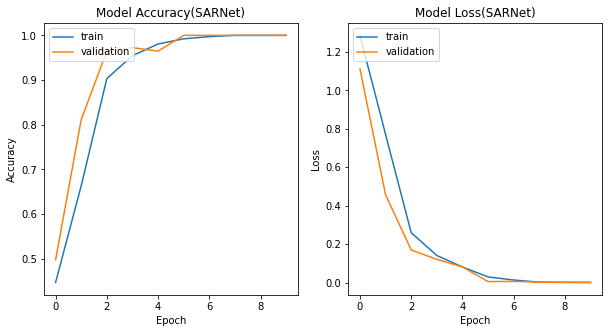

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_sar.history['accuracy'])
plt.plot(history_sar.history['val_accuracy'])
plt.title('Model Accuracy(SARNet)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

# Plot loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_sar.history['loss'])
plt.plot(history_sar.history['val_loss'])
plt.title('Model Loss(SARNet)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

41/41 [==============================] - 19s 432ms/step


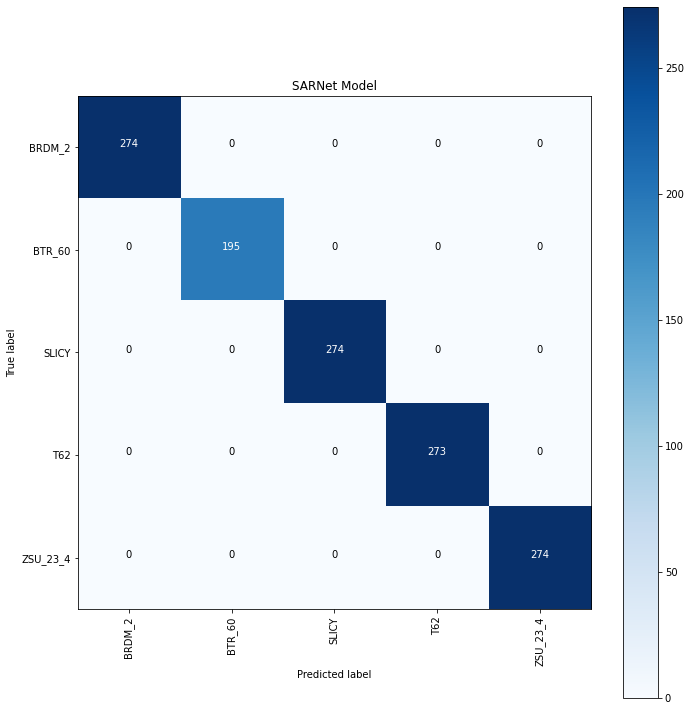

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import itertools

# Make predictions on the test set
preds_sar = sar_model.predict(test_generator)

# Convert predictions and true labels to one-hot encoded vectors
pred_classes = np.argmax(preds_sar, axis=1)
true_classes = test_generator.classes

# Create a confusion matrix
sar_cm = confusion_matrix(true_classes, pred_classes)
#print(sar_cm)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(sar_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
fmt = 'd'
thresh = sar_cm.max() / 2.
for i, j in itertools.product(range(sar_cm.shape[0]), range(sar_cm.shape[1])):
    plt.text(j, i, format(sar_cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if sar_cm[i, j] > thresh else "black")
plt.tight_layout()
plt.title('SARNet Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Classification Report(SARNet)

In [ ]:
true_classes = test_generator.classes
class_names = list(test_generator.class_indices.keys())
print('Classification Report:\n', classification_report(true_classes, pred_classes, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

      BRDM_2       1.00      1.00      1.00       274
      BTR_60       1.00      1.00      1.00       195
       SLICY       1.00      1.00      1.00       274
         T62       1.00      1.00      1.00       273
    ZSU_23_4       1.00      1.00      1.00       274

    accuracy                           1.00      1290
   macro avg       1.00      1.00      1.00      1290
weighted avg       1.00      1.00      1.00      1290



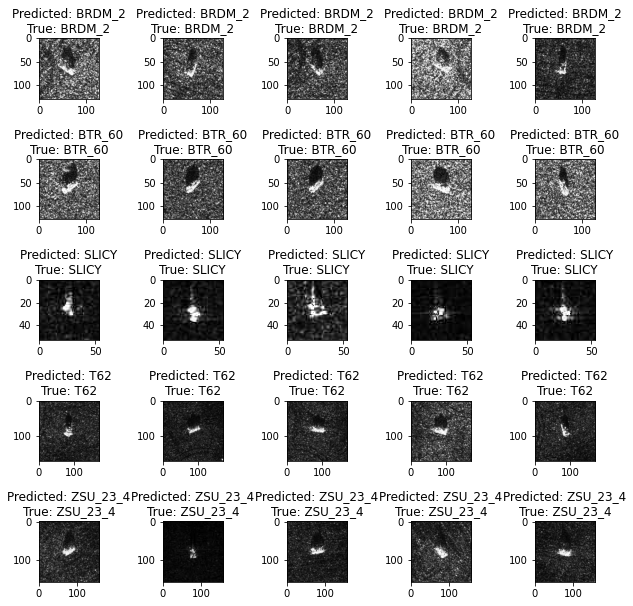

In [ ]:
test_data = test_generator

predicted_labels = np.argmax(preds_sar, axis=1)
true_labels = test_data.classes

# Display the predicted and true labels for 5 images in each class
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(hspace=1.0, wspace=1.0)
for i in range(len(class_names)):
    class_indices = np.where(true_labels == i)[0]
    random_indices = np.random.choice(class_indices, size=5, replace=False)
    for j, idx in enumerate(random_indices):
        img = plt.imread(test_data.filepaths[idx])
        axs[i, j].imshow(img, cmap = 'gray')
        axs[i, j].set_title("Predicted: {}\nTrue: {}".format(class_names[predicted_labels[idx]], 
                                                               class_names[true_labels[idx]]))
plt.show()

3. VGG16 model

In [ ]:
vgg_model = Sequential()
vgg_model.add(VGG16(include_top=False, input_shape=(img_size[0], img_size[1], 3)))
vgg_model.add(Flatten())
vgg_model.add(Dense(256, activation='relu'))
vgg_model.add(Dense(num_classes, activation='softmax'))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train VGG model

In [ ]:
history_vgg = vgg_model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
33/33 [==============================] - 901s 27s/step - loss: 2.7328 - accuracy: 0.2937 - val_loss: 1.4144 - val_accuracy: 0.3490
Epoch 2/10
33/33 [==============================] - 904s 27s/step - loss: 1.2357 - accuracy: 0.4377 - val_loss: 1.0887 - val_accuracy: 0.4471
Epoch 3/10
33/33 [==============================] - 896s 27s/step - loss: 1.1834 - accuracy: 0.4551 - val_loss: 1.1094 - val_accuracy: 0.5137
Epoch 4/10
33/33 [==============================] - 899s 27s/step - loss: 1.0841 - accuracy: 0.4715 - val_loss: 0.9064 - val_accuracy: 0.5608
Epoch 5/10
33/33 [==============================] - 868s 26s/step - loss: 1.0121 - accuracy: 0.5420 - val_loss: 0.9271 - val_accuracy: 0.5020
Epoch 6/10
33/33 [==============================] - 894s 27s/step - loss: 1.3638 - accuracy: 0.4087 - val_loss: 1.1474 - val_accuracy: 0.4392
Epoch 7/10
33/33 [==============================] - 898s 28s/step - loss: 1.0829 - accuracy: 0.5169 - val_loss: 1.3498 - val_accuracy: 0.4275
Epoch 

VGG Model Summary

In [ ]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 16,813,381
Trainable params: 16,813,381
Non-trainable params: 0
_________________________________________________________________


VGG Model Evaluation

In [ ]:
test_loss_vgg, test_acc_vgg = vgg_model.evaluate(validation_generator)
print('Test accuracy for VGG Model:', test_acc_vgg)

8/8 [==============================] - 54s 7s/step - loss: 0.7968 - accuracy: 0.7216
Test accuracy for VGG Model: 0.7215686440467834


Accuracy/loss v/s epoch

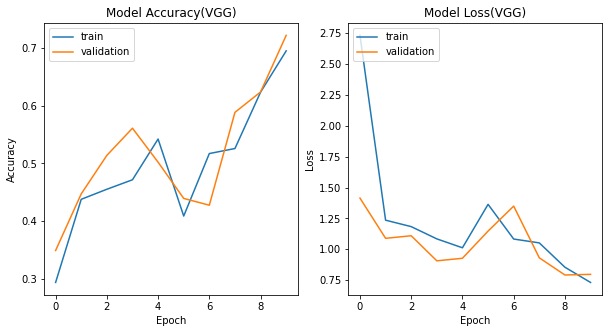

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('Model Accuracy(VGG)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

# Plot loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('Model Loss(VGG)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [ ]:
# Make predictions on the test set
preds_vgg = vgg_model.predict(test_generator)

# Convert predictions and true labels to one-hot encoded vectors
pred_classes_vgg = np.argmax(preds_vgg, axis=1)
true_classes_vgg = test_generator.classes

# Create a confusion matrix
vgg_cm = confusion_matrix(true_classes_vgg, pred_classes_vgg)
#print(vgg_cm)

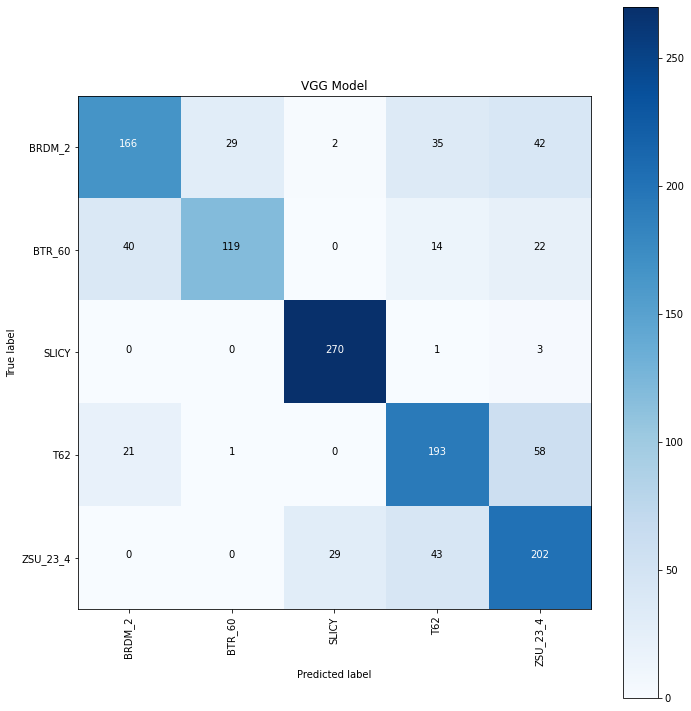

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(vgg_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
fmt = 'd'
thresh = vgg_cm.max() / 2.
for i, j in itertools.product(range(vgg_cm.shape[0]), range(vgg_cm.shape[1])):
    plt.text(j, i, format(vgg_cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if vgg_cm[i, j] > thresh else "black")
plt.tight_layout()
plt.title('VGG Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Classification report

In [ ]:
print('Classification Report:\n', classification_report(true_classes_vgg, pred_classes_vgg, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

      BRDM_2       0.73      0.61      0.66       274
      BTR_60       0.80      0.61      0.69       195
       SLICY       0.90      0.99      0.94       274
         T62       0.67      0.71      0.69       273
    ZSU_23_4       0.62      0.74      0.67       274

    accuracy                           0.74      1290
   macro avg       0.74      0.73      0.73      1290
weighted avg       0.74      0.74      0.73      1290



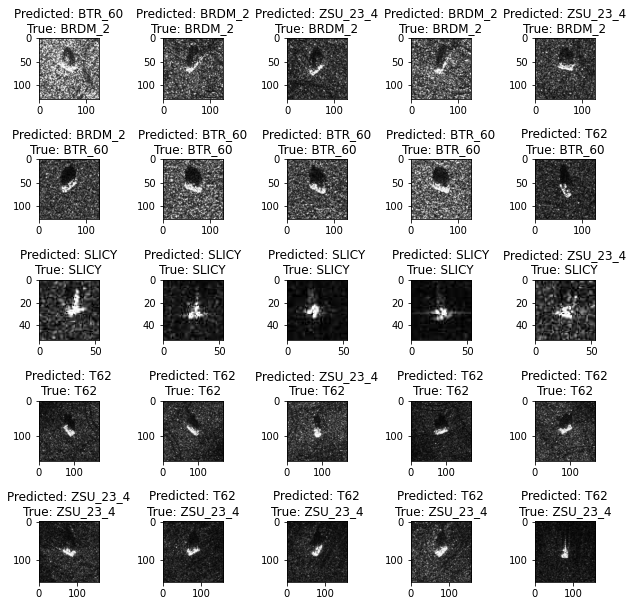

In [ ]:
test_data = test_generator

predicted_labels_vgg = np.argmax(preds_vgg, axis=1)
true_labels_vgg = test_data.classes

# Display the predicted and true labels for 5 images in each class
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(hspace=1.0, wspace=1.0)
for i in range(len(class_names)):
    class_indices = np.where(true_labels == i)[0]
    random_indices = np.random.choice(class_indices, size=5, replace=False)
    for j, idx in enumerate(random_indices):
        img = plt.imread(test_data.filepaths[idx])
        axs[i, j].imshow(img, cmap = 'gray')
        axs[i, j].set_title("Predicted: {}\nTrue: {}".format(class_names[predicted_labels_vgg[idx]], 
                                                               class_names[true_labels_vgg[idx]]))
plt.show()